# Task 1: Classical ML with Scikit-learn

Dataset shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (

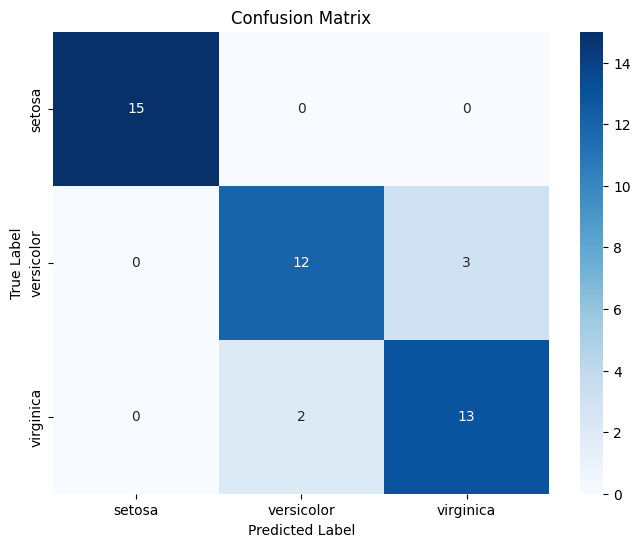


=== Feature Importance ===
             feature  importance
2  petal length (cm)    0.542251
3   petal width (cm)    0.445904
0  sepal length (cm)    0.011844
1   sepal width (cm)    0.000000


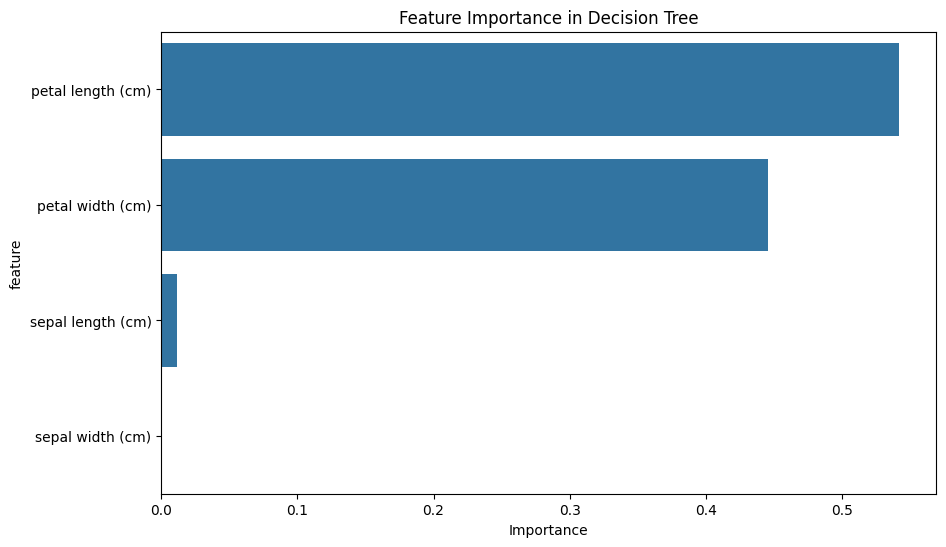

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Option 1: Load from sklearn
iris = load_iris()
X, y = iris.data, iris.target

# Create DataFrame for better handling and visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species_name'] = [iris.target_names[i] for i in y]

# Data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSpecies distribution:")
print(df['species_name'].value_counts())

# Data preprocessing
# Check for missing values and handle them
if df.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df = df.dropna()  # or use df.fillna(method='mean') for numerical columns

# Feature scaling (optional for decision trees but good practice)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Optional: Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train decision tree classifier
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,  # Prevent overfitting
    min_samples_split=5,
    min_samples_leaf=3
)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\n=== Model Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importance ===")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.show()

# Task 2: Deep Learning with TensorFlow/PyTorch

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: 0 - 255
Label distribution in training set:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


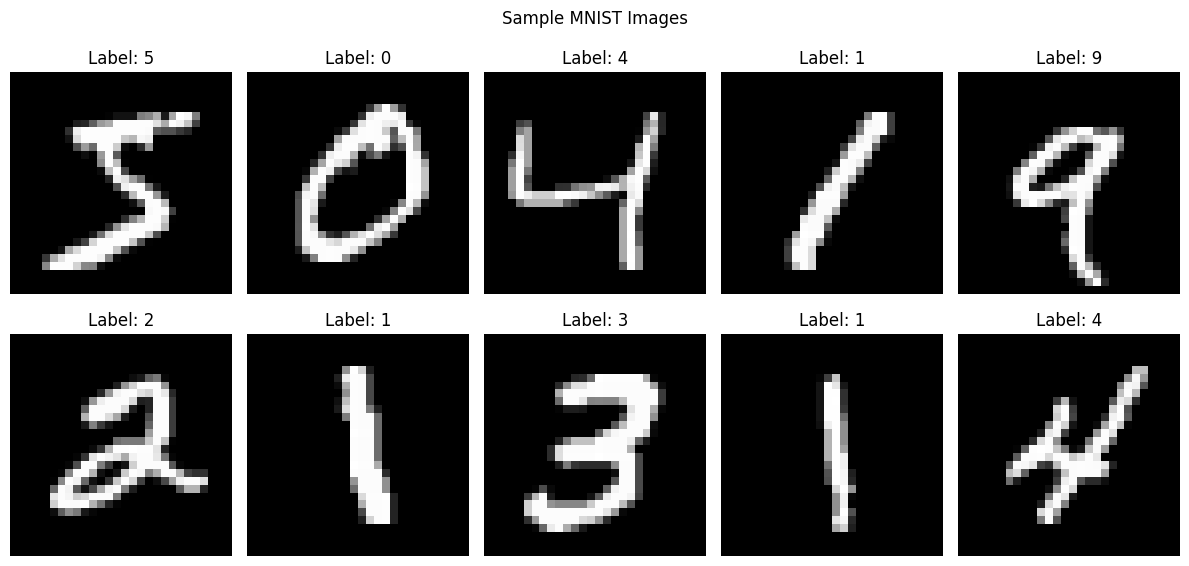

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,058 (976.79 KB)

 Trainable params: 249,610 (975.04 KB)

 Non-trainable params: 448 (1.75 KB)

Training model...
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - accuracy: 0.8147 - loss: 0.6036 - val_accuracy: 0.7182 - val_loss: 1.2058 - learning_rate: 0.0010
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 176ms/step - accuracy: 0.9730 - loss: 0.1009 - val_accuracy: 0.9848 - val_loss: 0.0561 - learning_rate: 0.0010
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.9806 - loss: 0.0758 - val_accuracy: 0.9845 - val_loss: 0.0553 - learning_rate: 0.0010
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 75s 177ms/step - accuracy: 0.9862 - loss: 0.0532 - val_accuracy: 0.9882 - val_loss: 0.0485 - learning_rate: 0.0010
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 173ms/step - accuracy: 0.9884 - loss: 0.0438 - val_accuracy: 0.9922 - val_loss: 0.0317 - learning_rate: 0.0010
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 177ms/step - accuracy: 0.9902 - loss: 0.0350 - val_accuracy: 0.9902 - val_loss: 0.0450 - learning_rate: 0.0010
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 73s 174ms/st

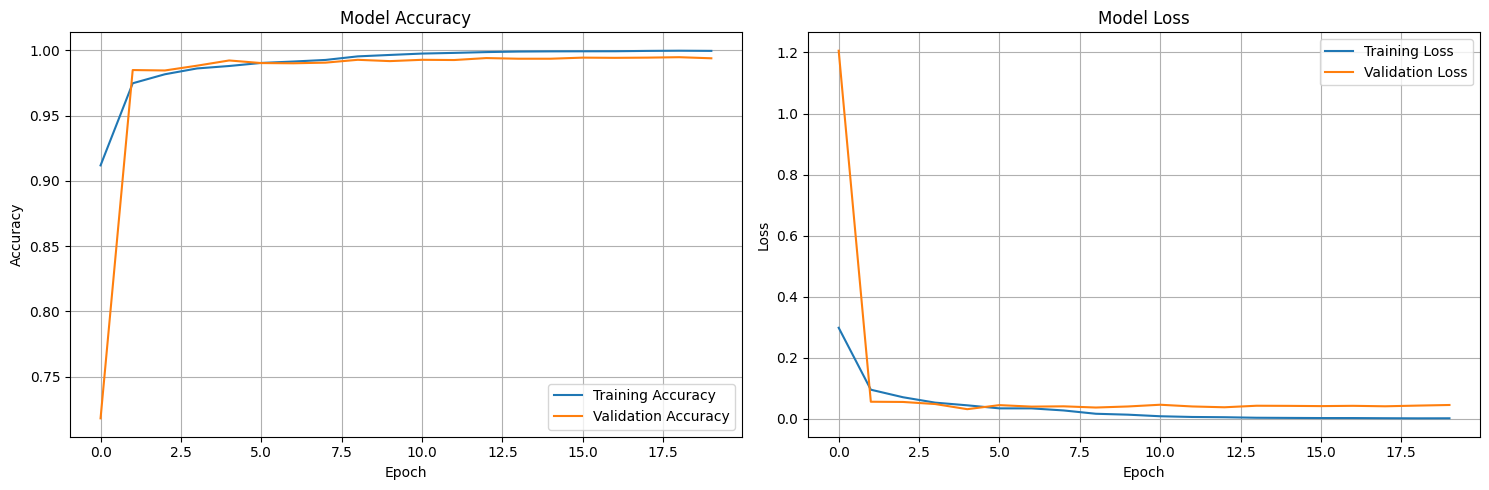

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9959    0.9990    0.9975       980
           1     0.9965    0.9982    0.9974      1135
           2     0.9971    0.9952    0.9961      1032
           3     0.9902    0.9960    0.9931      1010
           4     0.9939    0.9919    0.9929       982
           5     0.9933    0.9899    0.9916       892
           6     0.9958    0.9927    0.9942       958
           7     0.9951    0.9951    0.9951      1028
           8     0.9959    0.9938    0.9949       974
           9     0.9911    0.9921    0.9916      1009

    accuracy                         0.9945     10000
   macro avg     0.9945    0.9944    0.9944     10000
weighted avg     0.9945    0.9945    0.9945     10000



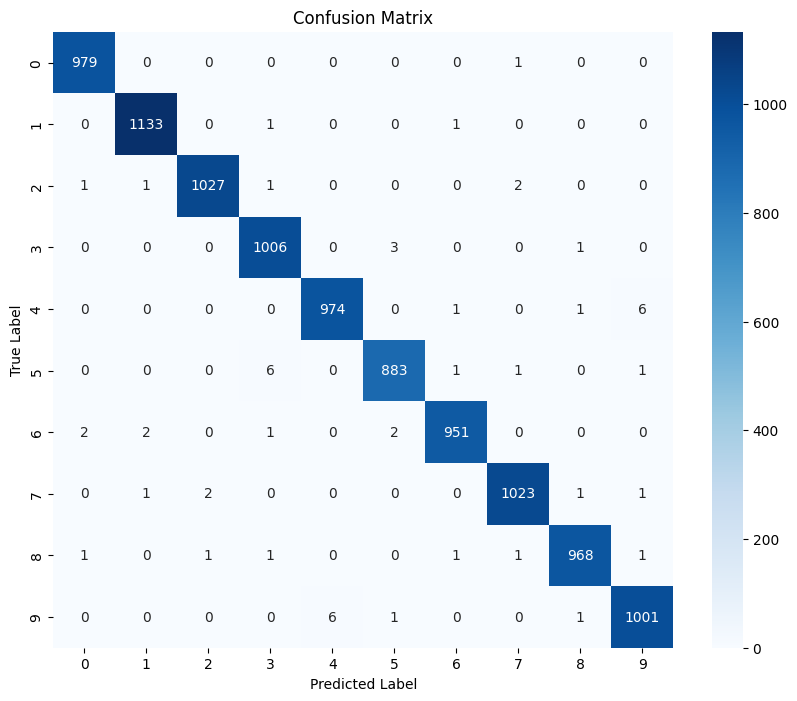


=== Sample Predictions ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


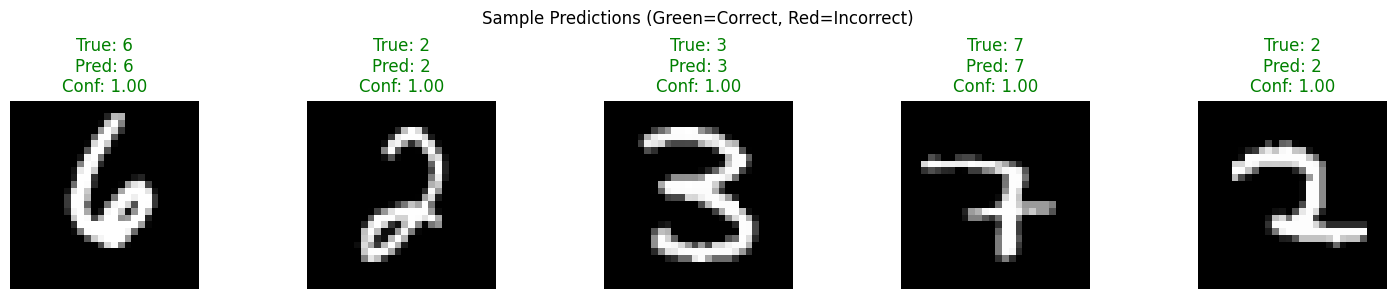


Model saved as 'mnist_model.h5'

=== Final Model Performance ===
Test Accuracy: 0.9945
Test Loss: 0.0365
Total Parameters: 250,058


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load MNIST data from TensorFlow datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Data exploration
print(f"\nPixel value range: {x_train.min()} - {x_train.max()}")
print(f"Label distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.suptitle('Sample MNIST Images')
plt.tight_layout()
plt.show()

# Data preprocessing
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Build CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Model summary
model.summary()

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7
    )
]

# Train model
print("Training model...")
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# Evaluate model
print("\nEvaluating model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Check if we achieved >95% accuracy
if test_accuracy > 0.95:
    print("✅ Successfully achieved >95% test accuracy!")
else:
    print("❌ Model did not achieve >95% test accuracy. Consider:")
    print("   - Increasing epochs")
    print("   - Adjusting learning rate")
    print("   - Adding data augmentation")
    print("   - Tuning hyperparameters")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Make predictions on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize predictions on 5 sample images
print("\n=== Sample Predictions ===")
sample_indices = np.random.choice(len(x_test), 5, replace=False)
sample_images = x_test[sample_indices]
sample_predictions = model.predict(sample_images)
sample_pred_classes = np.argmax(sample_predictions, axis=1)
sample_true_classes = y_test[sample_indices]
sample_confidences = np.max(sample_predictions, axis=1)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (img, true_class, pred_class, confidence) in enumerate(
    zip(sample_images, sample_true_classes, sample_pred_classes, sample_confidences)
):
    axes[i].imshow(img.reshape(28, 28), cmap='gray')
    color = 'green' if true_class == pred_class else 'red'
    axes[i].set_title(f'True: {true_class}\nPred: {pred_class}\nConf: {confidence:.2f}',
                     color=color)
    axes[i].axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
plt.tight_layout()
plt.show()

# Save model for deployment
model.save('mnist_model.h5')
print("\nModel saved as 'mnist_model.h5'")

# Model performance summary
print(f"\n=== Final Model Performance ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Total Parameters: {model.count_params():,}")

# Task 3: NLP with spaCy

Loading Amazon Reviews dataset...
Error: File not found at train.ft.txt
Dataset file 'train.ft.txt' not found or could not be loaded. Using sample data...
Dataset shape: (10, 2)
Sentiment distribution:
actual_sentiment
negative    6
positive    4
Name: count, dtype: int64

Processing reviews...
Processing review 1/10

=== Sample Results ===

Review 1: The iPhone 14 Pro from Apple is amazing! Great camera quality and battery life....
Entities: ['Apple']
Rule-based sentiment: positive
TextBlob sentiment: positive (polarity: 0.78)
Actual sentiment: positive
--------------------------------------------------------------------------------

Review 2: Samsung Galaxy S23 disappointed me. Battery life is terrible and overpriced....
Entities: ['Samsung Galaxy S23']
Rule-based sentiment: negative
TextBlob sentiment: negative (polarity: -0.88)
Actual sentiment: negative
--------------------------------------------------------------------------------

Review 3: Love my new MacBook Pro! Apple really

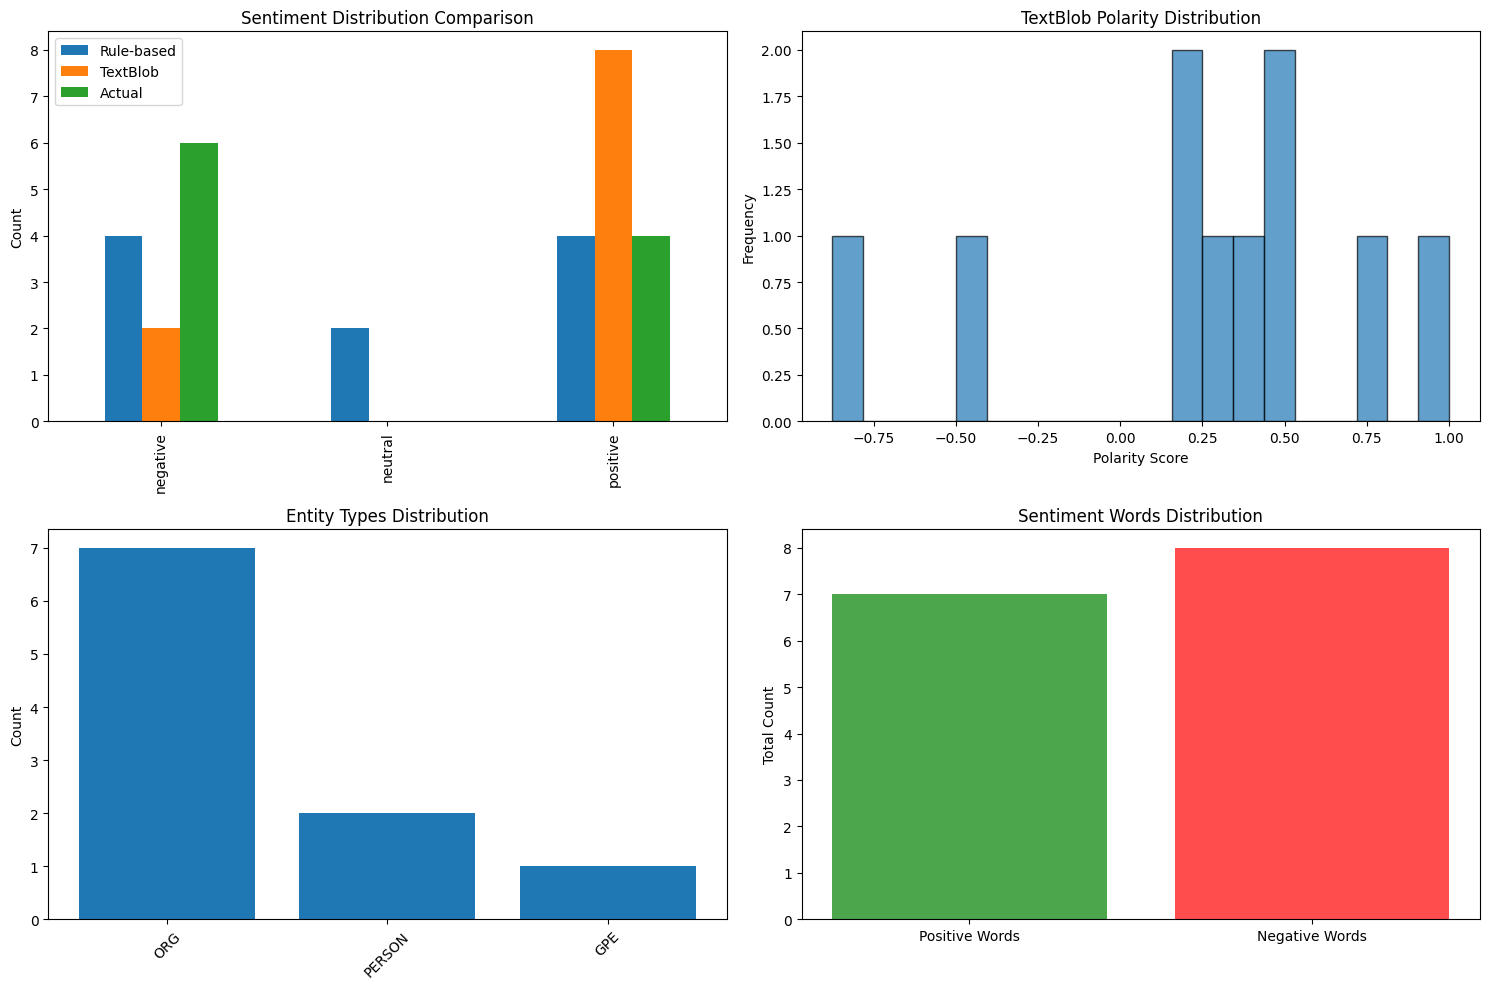


Results saved to 'amazon_reviews_analysis.csv'

=== Advanced NLP Analysis ===
Product/Brand Sentiment Analysis:
Apple: 100.0% positive, 0.0% negative (total: 1)
Samsung Galaxy S23: 0.0% positive, 100.0% negative (total: 1)
MacBook Pro! Apple: 100.0% positive, 0.0% negative (total: 1)
Sony: 0.0% positive, 100.0% negative (total: 1)
Amazon: 100.0% positive, 0.0% negative (total: 1)
Microsoft Surface Pro: 0.0% positive, 100.0% negative (total: 1)
Nike Air Max: 0.0% positive, 0.0% negative (total: 1)


In [ ]:
import spacy
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from sklearn.model_selection import train_test_split
import os

# Load spaCy model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Please install the English model: python -m spacy download en_core_web_sm")
    # If the model is not installed, try downloading it programmatically
    try:
        os.system("python -m spacy download en_core_web_sm")
        nlp = spacy.load("en_core_web_sm")
        print("spaCy model 'en_core_web_sm' downloaded and loaded.")
    except Exception as e:
        print(f"Failed to download and load spaCy model: {e}")
        print("Exiting script.")
        exit()


# Function to load Amazon reviews from the FastText format file
def load_amazon_reviews(filepath, max_samples=5000):
    """Load Amazon reviews from the FastText format file"""
    reviews = []
    labels = []

    # Check if the file exists
    if not os.path.exists(filepath):
        print(f"Error: File not found at {filepath}")
        return reviews, labels # Return empty lists if file doesn't exist

    with open(filepath, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= max_samples:  # Limit samples for faster processing
                break

            # Parse FastText format: __label__1 or __label__2 followed by text
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                label = parts[0]
                text = parts[1]

                # Clean and process text
                text = re.sub(r'[^\w\s]', ' ', text)  # Remove special characters
                text = ' '.join(text.split())  # Normalize whitespace

                if len(text) > 20:  # Filter out very short reviews
                    reviews.append(text)
                    # Convert label to sentiment (1=negative, 2=positive)
                    labels.append('negative' if label == '__label__1' else 'positive')

    return reviews, labels

# Load data (adjust path as needed)
print("Loading Amazon Reviews dataset...")
dataset_filepath = 'train.ft.txt' # Assuming the file is in the same directory or mounted

try:
    reviews, labels = load_amazon_reviews(dataset_filepath, max_samples=1000)
    if not reviews: # If loading from file failed, use sample data
         raise FileNotFoundError # Raise error to trigger sample data loading
    print(f"Loaded {len(reviews)} reviews from {dataset_filepath}")
except FileNotFoundError:
    # Use sample data if dataset not available or loading failed
    print(f"Dataset file '{dataset_filepath}' not found or could not be loaded. Using sample data...")
    reviews = [
        "The iPhone 14 Pro from Apple is amazing! Great camera quality and battery life.",
        "Samsung Galaxy S23 disappointed me. Battery life is terrible and overpriced.",
        "Love my new MacBook Pro! Apple really outdid themselves with this laptop.",
        "These Sony WH-1000XM4 headphones are decent but overpriced for the quality.",
        "Google Pixel 7 has excellent photo quality but poor build quality overall.",
        "Amazon Echo Dot is perfect for smart home control. Highly recommend!",
        "Tesla Model 3 is revolutionary. Best electric car on the market today.",
        "Netflix subscription is getting expensive but content quality is declining.",
        "Microsoft Surface Pro is versatile but keyboard feels cheap and flimsy.",
        "Nike Air Max shoes are comfortable but durability could be much better."
    ]
    labels = ['positive', 'negative', 'positive', 'negative', 'negative',
              'positive', 'positive', 'negative', 'negative', 'negative']

# Create DataFrame
df = pd.DataFrame({
    'review': reviews,
    'actual_sentiment': labels
})

print(f"Dataset shape: {df.shape}")
print(f"Sentiment distribution:\n{df['actual_sentiment'].value_counts()}")

def extract_entities_and_sentiment(text):
    """Extract named entities and analyze sentiment"""
    # Process text with spaCy
    doc = nlp(text)

    # Extract named entities
    entities = []
    for ent in doc.ents:
        # Focus on organizations (brands) and products
        if ent.label_ in ['ORG', 'PRODUCT', 'PERSON', 'GPE']:
            entities.append({
                'text': ent.text,
                'label': ent.label_,
                'start': ent.start_char,
                'end': ent.end_char
            })

    # Rule-based sentiment analysis
    positive_words = ['amazing', 'great', 'excellent', 'love', 'perfect', 'best',
                     'recommend', 'outstanding', 'fantastic', 'wonderful']
    negative_words = ['terrible', 'disappointed', 'poor', 'bad', 'awful',
                     'horrible', 'overpriced', 'cheap', 'flimsy', 'declining']

    # Count sentiment words
    text_lower = text.lower()
    pos_count = sum(1 for word in positive_words if word in text_lower)
    neg_count = sum(1 for word in negative_words if word in text_lower)

    # Rule-based sentiment
    if pos_count > neg_count:
        rule_sentiment = 'positive'
    elif neg_count > pos_count:
        rule_sentiment = 'negative'
    else:
        rule_sentiment = 'neutral'

    # TextBlob sentiment analysis
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        textblob_sentiment = 'positive'
    elif polarity < -0.1:
        textblob_sentiment = 'negative'
    else:
        textblob_sentiment = 'neutral'

    return {
        'text': text,
        'entities': entities,
        'rule_sentiment': rule_sentiment,
        'textblob_sentiment': textblob_sentiment,
        'polarity': polarity,
        'pos_words': pos_count,
        'neg_words': neg_count
    }

# Process all reviews
print("\nProcessing reviews...")
results = []
for i, review in enumerate(reviews):
    if i % 100 == 0:
        print(f"Processing review {i+1}/{len(reviews)}")

    result = extract_entities_and_sentiment(review)
    results.append(result)

# Create results DataFrame
df_results = pd.DataFrame(results)
# Only add 'actual_sentiment' if it exists (i.e., not sample data)
if labels:
    df_results['actual_sentiment'] = labels

# Display sample results
print("\n=== Sample Results ===")
for i in range(min(5, len(results))):
    result = results[i]
    print(f"\nReview {i+1}: {result['text'][:100]}...")
    print(f"Entities: {[ent['text'] for ent in result['entities']]}")
    print(f"Rule-based sentiment: {result['rule_sentiment']}")
    print(f"TextBlob sentiment: {result['textblob_sentiment']} (polarity: {result['polarity']:.2f})")
    if 'actual_sentiment' in df_results.columns:
        print(f"Actual sentiment: {labels[i]}")
    print("-" * 80)

# Analyze results
print("\n=== Analysis Results ===")

# Sentiment distribution
print("Rule-based Sentiment Distribution:")
print(df_results['rule_sentiment'].value_counts())

print("\nTextBlob Sentiment Distribution:")
print(df_results['textblob_sentiment'].value_counts())

if 'actual_sentiment' in df_results.columns:
    print("\nActual Sentiment Distribution:")
    print(df_results['actual_sentiment'].value_counts())

# Entity analysis
all_entities = []
for result in results:
    all_entities.extend([ent['text'] for ent in result['entities']])

entity_counts = Counter(all_entities)
print(f"\nTop 10 Most Mentioned Entities:")
for entity, count in entity_counts.most_common(10):
    print(f"{entity}: {count}")

# Sentiment accuracy (if we have ground truth)
if 'actual_sentiment' in df_results.columns:
    rule_accuracy = (df_results['rule_sentiment'] == df_results['actual_sentiment']).mean()
    textblob_accuracy = (df_results['textblob_sentiment'] == df_results['actual_sentiment']).mean()

    print(f"\nSentiment Analysis Accuracy:")
    print(f"Rule-based approach: {rule_accuracy:.2%}")
    print(f"TextBlob approach: {textblob_accuracy:.2%}")

# Visualizations
# Adjust number of subplots based on whether actual sentiment is available
num_subplots_row2 = 2 if 'actual_sentiment' in df_results.columns else 1
fig, axes = plt.subplots(2, num_subplots_row2, figsize=(15, 10))

# Sentiment distribution comparison
sentiment_comparison_data = {
    'Rule-based': df_results['rule_sentiment'].value_counts(),
    'TextBlob': df_results['textblob_sentiment'].value_counts(),
}
if 'actual_sentiment' in df_results.columns:
    sentiment_comparison_data['Actual'] = df_results['actual_sentiment'].value_counts()

sentiment_comparison = pd.DataFrame(sentiment_comparison_data).fillna(0)

sentiment_comparison.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Sentiment Distribution Comparison')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()

# Polarity distribution
axes[0, 1].hist(df_results['polarity'], bins=20, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('TextBlob Polarity Distribution')
axes[0, 1].set_xlabel('Polarity Score')
axes[0, 1].set_ylabel('Frequency')

# Entity types distribution
entity_types = []
for result in results:
    entity_types.extend([ent['label'] for ent in result['entities']])

entity_type_counts = Counter(entity_types)
if entity_type_counts:
    if num_subplots_row2 == 2:
        axes[1, 0].bar(entity_type_counts.keys(), entity_type_counts.values())
        axes[1, 0].set_title('Entity Types Distribution')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].tick_params(axis='x', rotation=45)
    else: # If only one subplot in the second row
        axes[1].bar(entity_type_counts.keys(), entity_type_counts.values())
        axes[1].set_title('Entity Types Distribution')
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=45)


# Sentiment words analysis
pos_neg_counts = df_results[['pos_words', 'neg_words']].sum()
if num_subplots_row2 == 2:
    axes[1, 1].bar(['Positive Words', 'Negative Words'], pos_neg_counts.values,
                   color=['green', 'red'], alpha=0.7)
    axes[1, 1].set_title('Sentiment Words Distribution')
    axes[1, 1].set_ylabel('Total Count')
else: # If only one subplot in the second row, skip this plot
    pass # Or handle differently if needed


plt.tight_layout()
plt.show()


# Save results
df_results.to_csv('amazon_reviews_analysis.csv', index=False)
print("\nResults saved to 'amazon_reviews_analysis.csv'")

# Advanced NLP analysis
print("\n=== Advanced NLP Analysis ===")

# Extract product mentions and associated sentiments
product_sentiment = {}
for result in results:
    entities = [ent['text'] for ent in result['entities'] if ent['label'] in ['ORG', 'PRODUCT']]
    sentiment = result['rule_sentiment']

    for entity in entities:
        if entity not in product_sentiment:
            product_sentiment[entity] = {'positive': 0, 'negative': 0, 'neutral': 0}
        product_sentiment[entity][sentiment] += 1

# Display product sentiment analysis
print("Product/Brand Sentiment Analysis:")
# Sort by total mentions in descending order
for product, sentiments in sorted(product_sentiment.items(), key=lambda item: sum(item[1].values()), reverse=True):
    total = sum(sentiments.values())
    if total > 0:  # Show all products mentioned
        pos_pct = sentiments['positive'] / total * 100
        neg_pct = sentiments['negative'] / total * 100
        print(f"{product}: {pos_pct:.1f}% positive, {neg_pct:.1f}% negative (total: {total})")